# **LEZIONE 2**


## **Exercise 02.1**
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.

## Soluzione

Per calcolare gli integrali usando metodi Monte Carlo, la funzione integranda $f(x)$ viene fattorizzata in una funzione di prova $g(x) = \frac{f(x)}{p(x)}$ e una distribuzione di probabilità normalizzata $p(x)$. In questo modo, l'integrale assume la forma:
$$
I = \int_{\Omega} \frac{f(x)}{p(x)} \, p(x) \, dx = \int_{\Omega} f(x) \, dx
$$

L’**importance sampling** è una tecnica utilizzata per ridurre la varianza nella stima Monte Carlo di un integrale. Invece di campionare uniformemente nello spazio $\Omega$, si campiona da una distribuzione di probabilità $p(x)$ che si adatta alla forma dell’integranda $f(x)$, privilegiando le regioni dove $f(x)$ è più grande.

In questo modo, si ottiene una stima più efficiente dell’integrale:
$$
I = \int_{\Omega} f(x) \, dx \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)} \quad \text{con} \quad x_i \sim p(x)
$$

La scelta di una buona distribuzione $p(x)$ è cruciale: idealmente, dovrebbe essere simile a $f(x)$ (o proporzionale a $|f(x)|$) per massimizzare l’efficienza del campionamento e ridurre la varianza della stima.

nel caso della funzione integranda  
$$f(x) = \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right),$$  
una buon metodo per trovare una distribuzione  $p(x)$  adatta (per l’**importance sampling**) è quello di espandere la funzione (ad esempio tramite una serie di Taylor) al primo ordine e normalizzare il risultato.

Facendo questo in $x=0$, tuttavia, si ottiene una distribuzione di probabilità **negativa**, ho quindi provato l'espansione in $x=1$, ottenendo, dopo la normalizzazione:
$$p(x)= 2-2x$$

Nella classe Random ho aggiunto un metodo col metodo dell'inversione della Cumulata per campionare valori secondo questa distribuzione:
```cpp
double Random :: DistribCos(void){
   double u = Rannyu();
   double x = 1- sqrt(1-u);

   return x;
}

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'sans-serif'

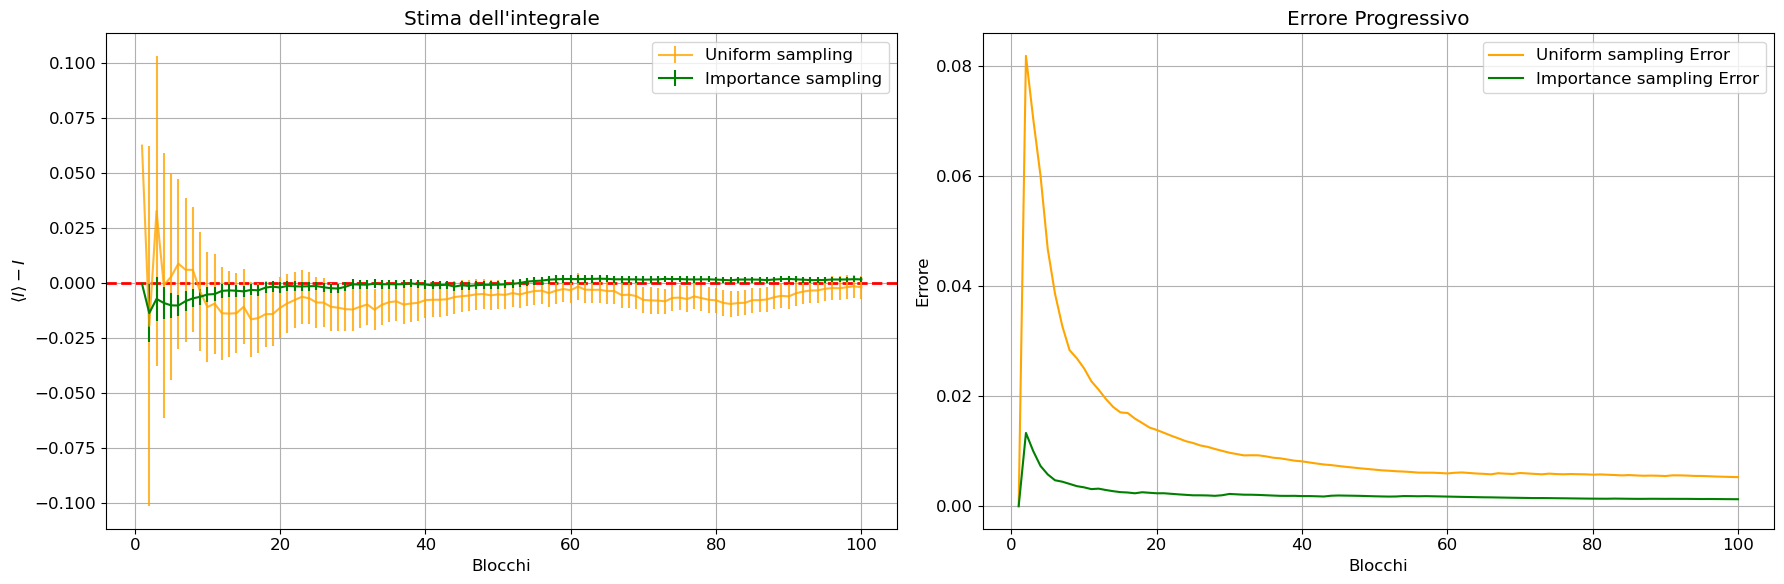

In [9]:
unif_data = pd.read_csv('data/risultati_2_1_1.out')
importance_data = pd.read_csv('data/risultati_2_1_2.out')


fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].axhline(0, color='red', lw=2., ls='--')
axs[0].errorbar(unif_data['Block'], unif_data['Integral']-1, yerr=unif_data['Error'], label='Uniform sampling', alpha =0.8, color = 'orange')
axs[0].errorbar(importance_data['Block'], importance_data['Integral']-1, yerr=importance_data['Error'], label='Importance sampling', alpha =1, color = 'green')
axs[0].legend()
axs[0].set_xlabel('Blocchi')
axs[0].set_ylabel(r'$\langle I \rangle - I$')
axs[0].set_title("Stima dell'integrale")
axs[0].grid(True)

axs[1].plot(unif_data['Block'], unif_data['Error'], label='Uniform sampling Error', color = 'orange')
axs[1].plot(importance_data['Block'], importance_data['Error'], label='Importance sampling Error', color = 'green')
axs[1].legend()
axs[1].set_xlabel('Blocchi')
axs[1].set_ylabel('Errore')
axs[1].set_title('Errore Progressivo')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Come si può notare abbiamo una grande differenza dal punto di vista della varianza sul calcolo del valore dell'integrale e della convergenza al valore atteso. Questo evidenzia l'efficacia del metodo dell'importance sampling.

## **Exercise 02.2**
- 3D Random Walks (RW) on a cubic lattice and in the continuum: Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## Soluzione
Un Random Walk (RW) è un processo stocastico che modella una traiettoria composta da una successione di passi casuali: può effettuare passi discreti o continui, in qualsiasi numero di dimensioni, in uno spazio discreto o continuo. Ho implementato un Random Walk con passo discreto 
𝑎
a (fissato a 1) in tre dimensioni, sia nel caso di spazio discreto che continuo.

In un RW, ogni passo dipende solo dal precedente: questa è la caratteristica fondamentale di un processo di Markov. Se visto come un processo di Markov senza memoria, il RW risulta essere un processo di diffusione: ciò significa che lo spostamento quadratico medio (cioè la distanza dall'origine) si comporta come $\sqrt{N}$
dove 
$𝑁$è il numero di passi. L’obiettivo di questo esercizio è verificare questo fatto.

Per risolvere questo esercizio ho implementato una classe posizione con il ruolo di eseguire gli spostamenti in uno spazio tridimensionale secondo le richieste dei due punti.

### Random Walk su un Reticolo Discreto

La posizione nel caso del RW discreto viene aggiornata tramite questo metodo:
```cpp
void Posizione :: UpdatePosDiscr(Random &rnd){
    int comp = int(rnd.Rannyu(0.,3.));     // genero un numero che può valere 0,1,2 e ne faccio la parte intera
    double verso = rnd.Rannyu();    // una volta estratta in modo randomico la componente, vado a estrarre il verso in cui avverrà lo step: 1=avanti, 0=indietro.
   
    if( verso<0.5 ){
        if(comp==0 ) x+=1.;
        if(comp==1 ) y+=1.;
        if(comp==2 ) z+=1.;
    
    }else{
        if(comp==0 ) x+= (-1.);
        if(comp==1 ) y+= (-1.);
        if(comp==2 ) z+= (-1.);
    }
}

In [10]:
def fit_sqrt(x, a) :
    return a * np.sqrt(x)

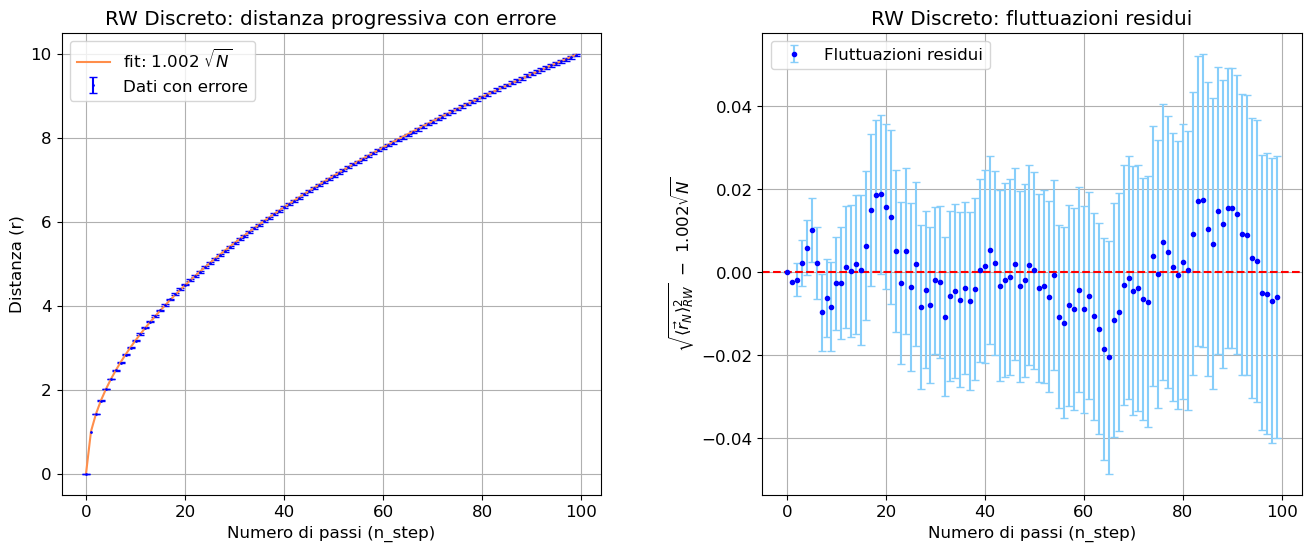

In [11]:
df21 = pd.read_csv("data/risultati2_2_1.out", sep=' ')

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.3})

# Primo subplot: r vs n_step con barre di errore
axs[0].errorbar(df21['n_step'], df21['r'], yerr=df21['error'], fmt='o', markersize=1, color='blue', capsize=3, label='Dati con errore')

# Fit con funzione k*sqrt(N)
popt, pcov = curve_fit(fit_sqrt, df21['n_step'], df21['r'])
dist_fit = fit_sqrt(df21['n_step'], *popt)

axs[0].plot(df21['n_step'], dist_fit, color='#FF8E4B', label=f'fit: {popt[0]:.3f} $\\sqrt{{N}}$')

axs[0].set_xlabel('Numero di passi (n_step)')
axs[0].set_ylabel('Distanza (r)')
axs[0].set_title('RW Discreto: distanza progressiva con errore')
axs[0].legend()
axs[0].grid(True)

# Secondo subplot: residui (distanza - fit) con barre di errore
residuals = df21['r'] - dist_fit
axs[1].errorbar(df21['n_step'], residuals, yerr=df21['error'], fmt='o', markersize=3, color='blue', ecolor='lightskyblue', capsize=3, label='Fluttuazioni residui')

# Linea zero
axs[1].axhline(0, color='red', linestyle='--')

axs[1].set_xlabel('Numero di passi (n_step)')
axs[1].set_ylabel(r'$ \sqrt{\langle \vec{r}_N \rangle^2_{RW}} \ - \ $' + str(np.round(popt[0], 3)) + '$\sqrt{N}$')
axs[1].set_title('RW Discreto: fluttuazioni residui')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Random Walk Continuo

La posizione nel caso del RW discreto viene aggiornata tramite questo metodo:
```cpp
void Posizione :: UpdatePosCont(Random &rnd){
   
    double theta = rnd.GenTheta(); //theta è compreso tra 0-π ()
    double phi = rnd.GenPhi(); // phi compreso tra 0-2π (pi greco si genera con ctrl+shift premuto e poi u03c0)

    x += sin(theta)*cos(phi);
    y += sin(theta)*sin(phi);
    z += cos(theta); // non mi servono più la componente ed il verso: questi mi sono gia forniti dalle funzioni seno e coseno che possono ssumere valori positivi o negativi
                     // e sono proiettate sugli assi
    
}

```

che permette di campionare uniformemente le direzioni sull'angolo solido.

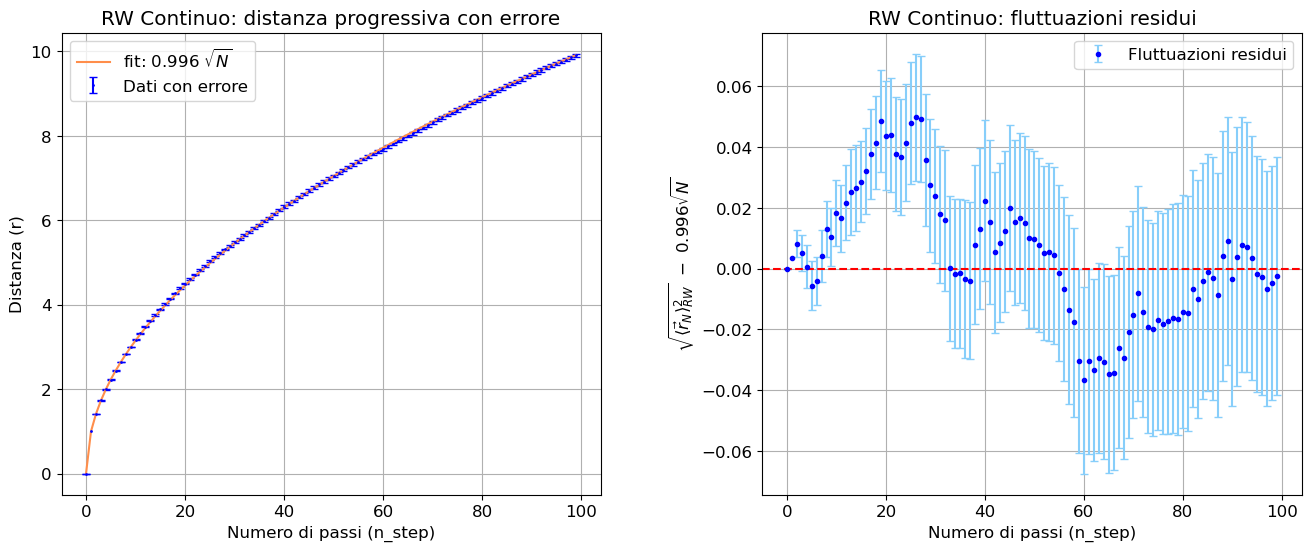

In [12]:
df22 = pd.read_csv("data/risultati2_2_2.out", sep=' ')

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.3})

# Primo subplot: r vs n_step con barre di errore
axs[0].errorbar(df22['n_step'], df22['r'], yerr=df22['error'], fmt='o', markersize=1, color='blue', capsize=3, label='Dati con errore')

# Fit con funzione k*sqrt(N)
popt, pcov = curve_fit(fit_sqrt, df22['n_step'], df22['r'])
dist_fit = fit_sqrt(df22['n_step'], *popt)

axs[0].plot(df22['n_step'], dist_fit, color='#FF8E4B', label=f'fit: {popt[0]:.3f} $\\sqrt{{N}}$')

axs[0].set_xlabel('Numero di passi (n_step)')
axs[0].set_ylabel('Distanza (r)')
axs[0].set_title('RW Continuo: distanza progressiva con errore')
axs[0].legend()
axs[0].grid(True)

# Secondo subplot: residui (distanza - fit) con barre di errore
residuals = df22['r'] - dist_fit
axs[1].errorbar(df22['n_step'], residuals, yerr=df22['error'], fmt='o', markersize=3, color='blue', ecolor='lightskyblue', capsize=3, label='Fluttuazioni residui')

# Linea zero
axs[1].axhline(0, color='red', linestyle='--')

axs[1].set_xlabel('Numero di passi (n_step)')
axs[1].set_ylabel(r'$ \sqrt{\langle \vec{r}_N \rangle^2_{RW}} \ - \ $' + str(np.round(popt[0], 3)) + '$\sqrt{N}$')
axs[1].set_title('RW Continuo: fluttuazioni residui')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

Per tutti e due i random walks, notiamo dai plot che la distanza media dall'origine segue coerentemente un andamento diffusivo. la compatibilità di questo comportamento è avvalorato dai plot dei residui in cui possiamo notare la compatibilità entro le barre d'errore.